What makes XGBoost so popular:

1) Speed and Performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

2) Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

3) Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

4) Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.


XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. 

Read https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9 for decision tree ensemble. 

Decision Tree Ensembles (Bagging and Boosting) 

* Random Forest is parallel algorithm for ensemble (Bagging)
* Gradient booting is sequential (Boosting) 

In this tutorial solve a regression problem using XGBoost:

The dataset is taken from the UCI Machine Learning Repository and is also present in sklearn's datasets module. It has 14 explanatory variables describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000s.
    

In [29]:
# Step 1 : Import Dataset 

from sklearn.datasets import load_boston
boston = load_boston()

In [32]:
# the boston is a dictionary so we can check its keys 
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [44]:
boston.data.shape

(506, 13)

In [50]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [51]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
# convert the data into dataframes 
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [55]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
# Append boston.target to your pandas DataFrame.
data['PRICE'] = boston.target 

In [57]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
# to get the useful information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [60]:
# Note that describe() only gives summary statistics of columns which are 
# continuous in nature and not categorical.

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


You will build the model using Trees as base learners (which are the default base learners) using XGBoost's scikit-learn compatible API. Along the way, you will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. As usual, you start by importing the library xgboost and other important libraries that you will be using for building the model.

In [61]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np 

In [64]:
# Separate the target variable and rest of the variables using .iloc 
# to subset the data.
X,y = data.iloc[:,:-1],data.iloc[:,-1]

Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [65]:
data_dmatrix = xgb.DMatrix(data= X, label=y)

C:\Rizwan\anaconda3\envs\machine learning\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Rizwan\anaconda3\envs\machine learning\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoost's hyperparameters:

At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:
* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models:
* gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* alpha: L1 regularization on leaf weights. A large value leads to more regularization.
* lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [69]:
# Train and test split from sklearn library 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 123)


In [71]:
# XGboost initialisation (For classification problems, you would
# have used the XGBClassifier() class.)
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,
                          learning_rate=0.1,max_depth=5,alpha=10,
                          n_estimators=10)

In [72]:
# Fit the regressor to the training set and make predictions on the test
# set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)

C:\Rizwan\anaconda3\envs\machine learning\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:05:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
preds = xg_reg.predict(X_test)

In [83]:
# Compute the rmse by invoking the mean_sqaured_error function from sklearn's
# metrics module.

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" %(rmse))

RMSE: 10.449300


Analysis: Well, you can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.

In [86]:
# k-fold Cross Validation using XGBoost
# In order to build more robust models, it is common to do a k-fold cross 
# validation where all the entries in the original training dataset are
# used for both training as well as validation.  Also, each entry is used
# for validation just once.

XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters, few pf them are:

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.

In [113]:
# You will use these parameters to build a 3-fold cross validation model
# by invoking XGBoost's cv() method and store the results in a cv_results 
# DataFrame. Note that here you are using the Dmatrix object you created 
# before.

params = {"objective": "reg:linear",'colsample_bytree':0.3,'learning_rae':0.1,
          'max_depth':5,'alpha':10}
cv_results = xgb.cv(dtrain=data_dmatrix, params= params,nfold = 3,
                    num_boost_round= 50,early_stopping_rounds=10,
                    metrics='rmse', as_pandas= True, seed=123) 

[20:31:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.352567,0.012048,17.354313,0.001677
1,12.998922,0.056980,12.994745,0.107389
2,9.971335,0.219584,10.044722,0.323191
3,7.674173,0.046481,7.967775,0.201156
4,6.238753,0.145578,6.720836,0.340294
5,5.194406,0.153373,5.912716,0.297667
6,4.416165,0.045499,5.427787,0.227750
7,3.887400,0.084919,5.141721,0.242972
8,3.576676,0.084330,4.935209,0.232458
9,3.253552,0.096864,4.668678,0.301483


In [114]:
# Extract and print the final boosting round metric.

print((cv_results["test-rmse-mean"]).tail(1))

49    3.75665
Name: test-rmse-mean, dtype: float64


Analysis: You can see that your RMSE for the price prediction has reduced 
as compared to last time and came out to be around 4.03 per 1000$. 
You can reach an even lower RMSE for a different set of hyper-parameters. 
You may consider applying techniques like Grid Search, Random Search and 
Bayesian Optimization to reach the optimal set of hyper-parameters.

### Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [162]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[21:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


plotting the first tree using matplotlib library 

In [167]:
'''import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()'''

"import matplotlib.pyplot as plt\n\nxgb.plot_tree(xg_reg,num_trees=0)\nplt.rcParams['figure.figsize'] = [50, 10]\nplt.show()"

In [125]:
# Another way to visualize your XGBoost models is to examine the 
# importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

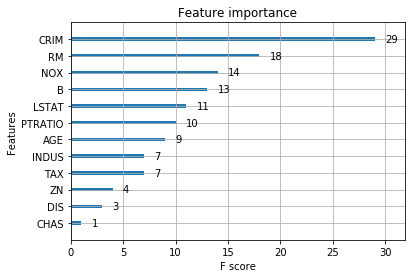

In [128]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Analysis: As you can see the feature RM has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection. Isn't this brilliant?

<------------------------------------------- :) :) --------------------->

It is preferable:
* when we have structured data 
* when we have a large amount of data (more than 100 examples)
* the number of features are less than number of training examples